In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler


pca_embeddings = np.load('../embeddings/pca_embeddings.npy')
pca_embeddings.shape

scaler = StandardScaler()
scaled_embeddings = scaler.fit_transform(pca_embeddings)

In [3]:
import matplotlib.pyplot as plt

def plot_clusters(labels, title):
    plt.scatter(scaled_embeddings[:, 0], scaled_embeddings[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

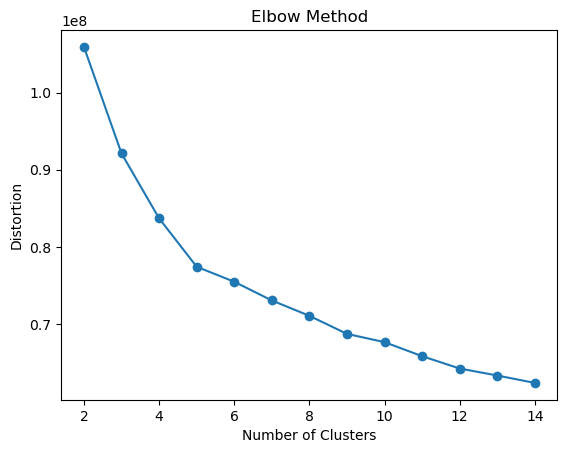

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_embeddings)
    distortions.append(kmeans.inertia_)

plt.plot(range(2, 15), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def analyze_kmeans_n_init(scaled_embeddings, cluster_range, n_init_values):
    """
    Analyze the effect of different n_init values on KMeans clustering results.

    Parameters:
    - scaled_embeddings: np.ndarray, the scaled embeddings to cluster.
    - cluster_range: range, the range of cluster numbers to explore.
    - n_init_values: list, the list of n_init values to explore.

    Returns:
    - results: dict, the results containing tuples of (n_clusters, n_init) and the corresponding inertia.
    """
    results = {}

    # Iterate through the range of cluster numbers and n_init values
    for n_clusters in cluster_range:
        for n_init in n_init_values:
            kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=42)
            kmeans.fit(scaled_embeddings)
            inertia = kmeans.inertia_
            results[(n_clusters, n_init)] = inertia

    # Convert results to a structured array for easier plotting
    results_array = np.array([(k[0], k[1], v) for k, v in results.items()], dtype=[('n_clusters', int), ('n_init', int), ('inertia', float)])

    # Plot the results
    plt.figure(figsize=(12, 8))
    for n_init in n_init_values:
        subset = results_array[results_array['n_init'] == n_init]
        plt.plot(subset['n_clusters'], subset['inertia'], marker='o', label=f'n_init={n_init}')
    
    plt.title('Effect of n_init on KMeans Clustering')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.legend(title='n_init')
    plt.grid()
    plt.show()

    return results

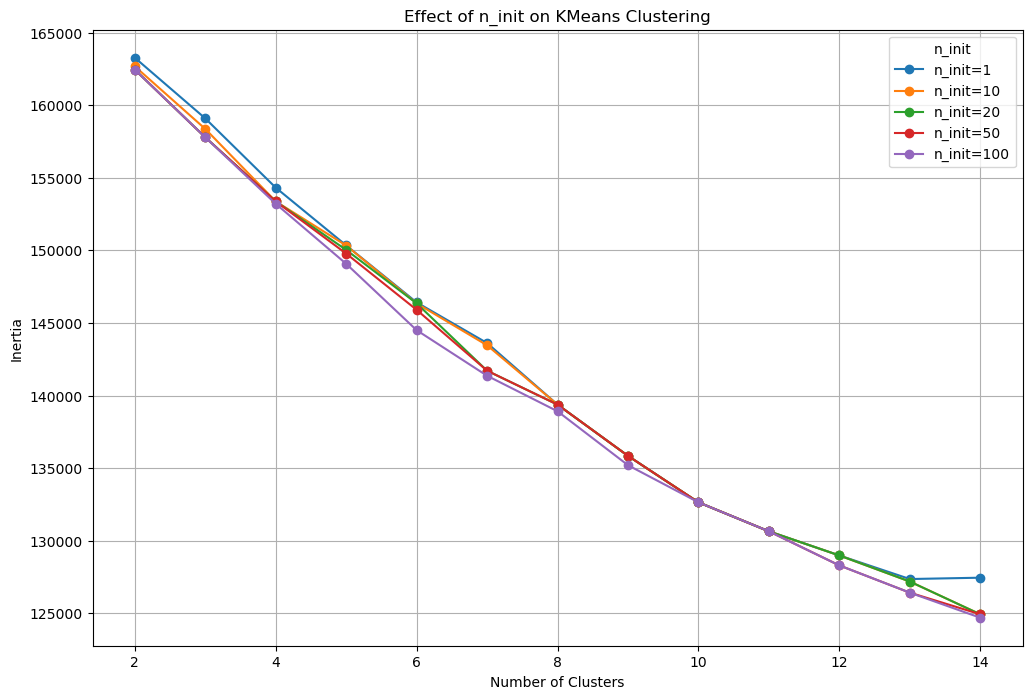

In [13]:
# Assuming scaled_embeddings is already defined
cluster_range = range(2, 15)  # Example range for number of clusters
n_init_values = [1, 10, 20, 50, 100]  # Example list of n_init values

# Call the function to analyze the effect of n_init values
results = analyze_kmeans_n_init(scaled_embeddings, cluster_range, n_init_values)

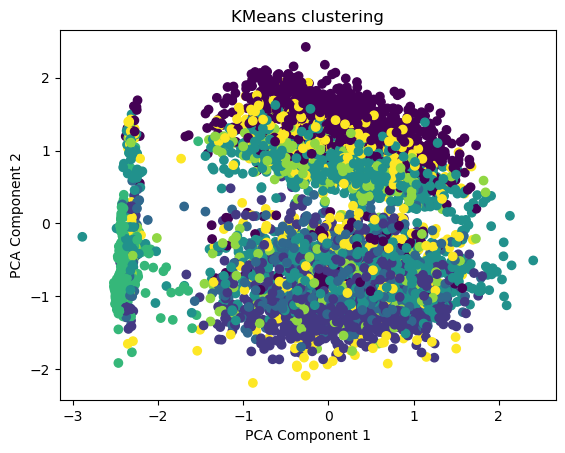

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, n_init=10, random_state=42)
cluster_labels_km = kmeans.fit_predict(scaled_embeddings)
plot_clusters(cluster_labels_km, 'KMeans clustering')
np.save('cluster_labels_km.npy', cluster_labels_km)